In [1]:
# Initial Set-Up

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import string
import seaborn as sns

#### 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Continuous Data -  Linear Regression, Ridge Regression, Lasso Regression, Multiple Linear Regression, Polynomial Regression, Bayesian Linear Regression?

Discrete Data -  LinearClassifier?, LogisticRegression, Decision Trees, RandomForestClassifier, KNeighborsClassifier, Support Vector Machines, Ensemble, Naive Bayes?, K Means Clustering

Neural Networks?
Dendrograms?

##### 2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

Continuous Data -

Discrete Data - 

##### 3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [2]:
customer = pd.read_csv('customer_data.csv', encoding = 'unicode_escape')
customer_df = pd.DataFrame(customer)
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
customer_df.shape

(541909, 8)

In [4]:
customer_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Drop Description column -- too many NaNs and StockCode column keeps track of items...so no need for Description

customer_df = customer_df.drop(['Description'], axis = 1)
customer_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Drop rows with any null values (which will only appear in CustomerID column at this point)

customer_df.dropna(axis=0, how='any', inplace=True)
customer_df.reset_index(inplace=True)
customer_df.drop(['index'], axis=1, inplace=True)
customer_df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
customer_df.shape

(406829, 7)

In [8]:
# Drop rows with non-positive value in Quantity column

dropped_df = pd.DataFrame(customer_df)
dropped_df.drop(dropped_df[dropped_df['Quantity'] <= 0].index, inplace=True)
dropped_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
406824,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
# Use pd.factorize to replace the InvoiceNo, StockCode, and Country data (which is alphanumeric) with numeric data


dropped_df['InvoiceNo']=pd.factorize(dropped_df['InvoiceNo'])[0]+1
dropped_df['StockCode']=pd.factorize(dropped_df['StockCode'])[0]+1
dropped_df['Country']=pd.factorize(dropped_df['Country'])[0]+1

dropped_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,1,1,6,12/1/2010 8:26,2.55,17850.0,1
1,1,2,6,12/1/2010 8:26,3.39,17850.0,1
2,1,3,8,12/1/2010 8:26,2.75,17850.0,1
3,1,4,6,12/1/2010 8:26,3.39,17850.0,1
4,1,5,6,12/1/2010 8:26,3.39,17850.0,1


In [13]:
dropped_df['InvoiceYear'] = pd.to_datetime(dropped_df['InvoiceDate']).dt.year
dropped_df['InvoiceMonth'] = pd.to_datetime(dropped_df['InvoiceDate']).dt.month
dropped_df['InvoiceDay'] = pd.to_datetime(dropped_df['InvoiceDate']).dt.day
dropped_df['InvoiceHour'] = pd.to_datetime(dropped_df['InvoiceDate']).dt.hour
dropped_df['InvoiceMinute'] = pd.to_datetime(dropped_df['InvoiceDate']).dt.minute
dropped_df = dropped_df.drop(['InvoiceDate'], axis = 1)
dropped_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceHour,InvoiceMinute
0,1,1,6,2.55,17850.0,1,2010,12,1,8,26
1,1,2,6,3.39,17850.0,1,2010,12,1,8,26
2,1,3,8,2.75,17850.0,1,2010,12,1,8,26
3,1,4,6,3.39,17850.0,1,2010,12,1,8,26
4,1,5,6,3.39,17850.0,1,2010,12,1,8,26


In [14]:
dropped_df.dtypes

InvoiceNo          int64
StockCode          int64
Quantity           int64
UnitPrice        float64
CustomerID       float64
Country            int64
InvoiceYear        int64
InvoiceMonth       int64
InvoiceDay         int64
InvoiceHour        int64
InvoiceMinute      int64
dtype: object

In [15]:
X = dropped_df.drop('CustomerID',axis=1)
y = dropped_df['CustomerID']

In [ ]:
plt.scatter(X['StockCode'].to_list,X['Country'].to_list)

for i, txt in enumerate(y):
    plt.annotate(txt, (X['StockCode'],X['Country']))

plt.xlabel('StockCode')
plt.ylabel('Country')

plt.show()

##### 4.	Perform k-means on this dataset for customer segments. 

In [ ]:
inertias = []
distortions = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #average of squared distance from cluster center to the data points
    distortion= sum(np.min(cdist(X,model.cluster_centers_,
                     'euclidean'), axis=1))/X.shape[0]
    
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

##### Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? 

##### What is the ideal number of clusters? 

##### Which approach did you use to find the ideal number of clusters and why?

##### 5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

##### 6.	Compare the results of 4 and 5. Which approach do you think is best? Why? 

### DataCamp

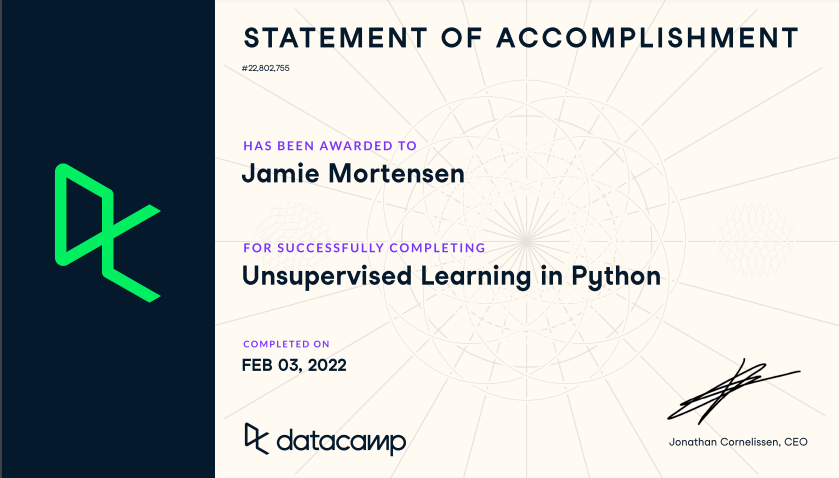